# Import Library

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import train_test_split

Mengimpor seluruh pustaka yang dibutuhkan untuk analisis data, visualisasi, pemrosesan teks, pembuatan sistem rekomendasi berbasis content dan user (collaborative filtering), serta pemisahan data latih dan uji.

# Data Understanding

In [4]:
df_book = pd.read_csv('BX_Books.csv', sep= ';', encoding= 'latin-1')
df_book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271375,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271377,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


Membaca dataset berisi informasi buku dari file BX_Books.csv dengan pemisah ; dan encoding 'latin-1', lalu menampilkannya dalam bentuk DataFrame df_book. Data ini akan digunakan dalam sistem rekomendasi berbasis konten.

In [9]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271377 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


Menampilkan ringkasan struktur DataFrame df_book, termasuk jumlah entri, jumlah non-null di setiap kolom, tipe data, dan penggunaan memori. Digunakan untuk memahami kelengkapan dan tipe data pada dataset buku.

In [5]:
df_book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Menghitung jumlah nilai yang hilang (null) di setiap kolom pada DataFrame. Berguna untuk mengidentifikasi kolom mana yang memiliki data tidak lengkap sebelum melakukan pembersihan data.

In [8]:
df_book.duplicated().sum()

0

Menghitung jumlah baris duplikat pada DataFrame. Duplikasi bisa mengganggu proses analisis atau pelatihan model, sehingga perlu dihapus jika ditemukan.

In [6]:
df_user = pd.read_csv('BX_Users.csv', sep= ';', encoding= 'latin-1')
df_user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


Membaca dataset berisi informasi user dari file BX_Users.csv dengan pemisah ; dan encoding 'latin-1', lalu menampilkannya dalam bentuk DataFrame df_user. Data ini akan digunakan dalam sistem rekomendasi berbasis konten.

In [10]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Menampilkan ringkasan struktur DataFrame df_user, termasuk jumlah entri, jumlah non-null di setiap kolom, tipe data, dan penggunaan memori. Digunakan untuk memahami kelengkapan dan tipe data pada dataset buku.

In [11]:
df_user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

Menghitung jumlah nilai yang hilang (null) di setiap kolom pada DataFrame. Berguna untuk mengidentifikasi kolom mana yang memiliki data tidak lengkap sebelum melakukan pembersihan data.

In [12]:
df_user.duplicated().sum()

0

Menghitung jumlah baris duplikat pada DataFrame. Duplikasi bisa mengganggu proses analisis atau pelatihan model, sehingga perlu dihapus jika ditemukan.

In [13]:
df_rating = pd.read_csv('BX-Book-Ratings.csv', sep= ';', encoding= 'latin-1')
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


Membaca dataset berisi informasi rating dari file BX-Book-Ratings.csv dengan pemisah ; dan encoding 'latin-1', lalu menampilkannya dalam bentuk DataFrame df_rating. Data ini akan digunakan dalam sistem rekomendasi berbasis konten.

In [94]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Menampilkan ringkasan struktur DataFrame df_rating, termasuk jumlah entri, jumlah non-null di setiap kolom, tipe data, dan penggunaan memori. Digunakan untuk memahami kelengkapan dan tipe data pada dataset buku.

In [95]:
df_rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Menghitung jumlah nilai yang hilang (null) di setiap kolom pada DataFrame. Berguna untuk mengidentifikasi kolom mana yang memiliki data tidak lengkap sebelum melakukan pembersihan data.

In [96]:
df_rating.duplicated().sum()

0

Menghitung jumlah baris duplikat pada DataFrame. Duplikasi bisa mengganggu proses analisis atau pelatihan model, sehingga perlu dihapus jika ditemukan.

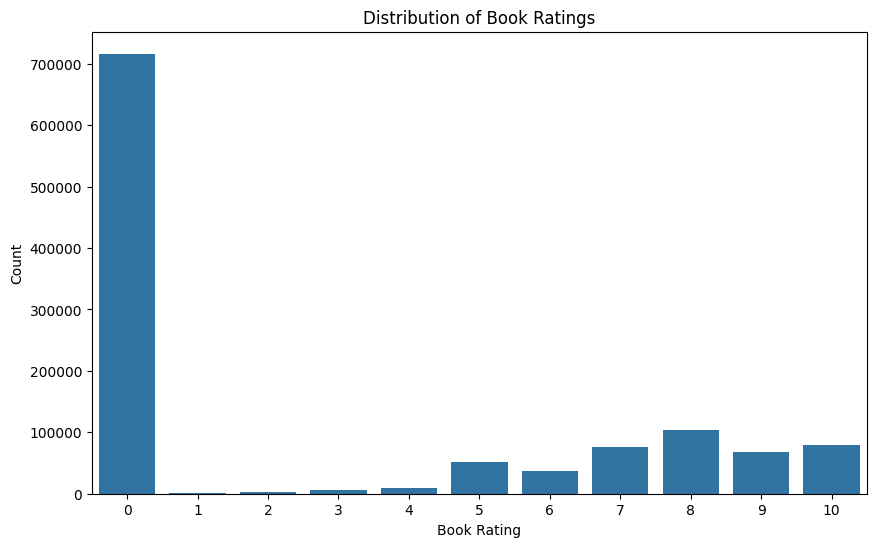

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_rating, x='Book-Rating')
plt.title('Distribution of Book Ratings')  
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.show()

Menampilkan grafik batang distribusi rating buku dari dataset df_rating. Grafik ini membantu memahami sebaran nilai rating (misalnya, apakah data condong ke rating rendah atau tinggi) dan mendeteksi potensi ketidakseimbangan pada data.

In [ ]:
top_books = df_rating['ISBN'].value_counts().head(10)

top_books_df = df_book[df_book['ISBN'].isin(top_books.index)][['ISBN', 'Book-Title']]
top_books_df = top_books_df.merge(top_books.rename('Rating Count'), left_on='ISBN', right_index=True)

top_books_df

,ISBN,Book-Title,Rating Count
26,0971880107,Wild Animus,2502
118,0671027360,Angels & Demons,586
305,044023722X,A Painted House,647
356,0142001740,The Secret Life of Bees,615
408,0316666343,The Lovely Bones: A Novel,1295
522,0312195516,The Red Tent (Bestselling Backlist),723
748,0385504209,The Da Vinci Code,883
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
1922,067976402X,Snow Falling on Cedars,614


Menyusun daftar 10 buku teratas berdasarkan jumlah rating terbanyak dari df_rating, lalu mencocokkannya dengan judul buku dari df_book. Output berupa DataFrame yang menampilkan ISBN, judul buku, dan jumlah rating yang diterima oleh masing-masing buku. Berguna untuk mengetahui buku-buku paling populer.

In [19]:
top_users = df_rating['User-ID'].value_counts().head(10)
top_users_df = df_user[df_user['User-ID'].isin(top_users.index)][['User-ID', 'Location']]
top_users_df = top_users_df.merge(top_users.rename('Rating Count'), left_on='User-ID', right_index=True)
top_users_df

,User-ID,Location,Rating Count
11675,11676,"n/a, n/a, n/a",13602
35858,35859,"duluth, minnesota, usa",5850
76351,76352,"olympia, washington, usa",3367
98390,98391,"morrow, georgia, usa",5891
110972,110973,"wiley ford, west virginia, usa",3100
153661,153662,"ft. stewart, georgia, usa",6109
198710,198711,"little canada, minnesota, usa",7550
212897,212898,"la ronge, saskatchewan, canada",4785
235104,235105,"st louis, missouri, usa",3067
278417,278418,"omaha, nebraska, usa",4533


Menampilkan 10 pengguna teratas yang memberikan rating terbanyak. Data mencakup User-ID, Location, dan jumlah rating yang diberikan. Berguna untuk mengidentifikasi pengguna paling aktif yang mungkin berpengaruh besar terhadap sistem rekomendasi.

# Data Preperation - Content Base Filtering

### Feature Selection

In [ ]:
books = df_book[['ISBN', 'Book-Title', 'Book-Author', 'Publisher']]
books

,ISBN,Book-Title,Book-Author,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,W. W. Norton & Company
...,...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger,Random House Childrens Pub (Mm)
271375,0525447644,From One to One Hundred,Teri Sloat,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,HarperSanFrancisco
271377,0192126040,Republic (World's Classics),Plato,Oxford University Press


Membuat subset DataFrame books yang hanya menyimpan kolom penting: ISBN, Book-Title, Book-Author, dan Publisher. Digunakan untuk menyederhanakan referensi buku dalam proses pemodelan dan rekomendasi.

### Null Cleaning

In [24]:
books = books.dropna()

books.isnull().sum()

ISBN           0
Book-Title     0
Book-Author    0
Publisher      0
dtype: int64

Menghapus baris yang memiliki nilai kosong (NaN) pada data books, lalu mengecek ulang jumlah nilai kosong untuk memastikan data sudah bersih sebelum digunakan dalam proses rekomendasi.

### Lowercase and Merge Column

In [25]:
books['Book-Author'] = books['Book-Author'].str.lower()
books['Book-Title'] = books['Book-Title'].str.lower()
books['Publisher'] = books['Publisher'].str.lower()

books['content'] = books['Book-Title'] + ' ' + books['Book-Author'] + ' ' + books['Publisher']
books

C:\Users\ikram\AppData\Local\Temp\ipykernel_17784\1182255623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Book-Author'] = books['Book-Author'].str.lower()
C:\Users\ikram\AppData\Local\Temp\ipykernel_17784\1182255623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Book-Title'] = books['Book-Title'].str.lower()
C:\Users\ikram\AppData\Local\Temp\ipykernel_17784\1182255623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

,ISBN,Book-Title,Book-Author,Publisher,content
0,0195153448,classical mythology,mark p. o. morford,oxford university press,classical mythology mark p. o. morford oxford ...
1,0002005018,clara callan,richard bruce wright,harperflamingo canada,clara callan richard bruce wright harperflamin...
2,0060973129,decision in normandy,carlo d'este,harperperennial,decision in normandy carlo d'este harperperennial
3,0374157065,flu: the story of the great influenza pandemic...,gina bari kolata,farrar straus giroux,flu: the story of the great influenza pandemic...
4,0393045218,the mummies of urumchi,e. j. w. barber,w. w. norton & company,the mummies of urumchi e. j. w. barber w. w. n...
...,...,...,...,...,...
271374,0440400988,there's a bat in bunk five,paula danziger,random house childrens pub (mm),there's a bat in bunk five paula danziger rand...
271375,0525447644,from one to one hundred,teri sloat,dutton books,from one to one hundred teri sloat dutton books
271376,006008667X,lily dale : the true story of the town that ta...,christine wicker,harpersanfrancisco,lily dale : the true story of the town that ta...
271377,0192126040,republic (world's classics),plato,oxford university press,republic (world's classics) plato oxford unive...


Melakukan normalisasi teks (menjadi huruf kecil) pada kolom Book-Author, Book-Title, dan Publisher, lalu menggabungkannya menjadi kolom content sebagai fitur gabungan untuk pemodelan Content-Based Filtering (CBF).

### Sampling / Filtering

In [39]:
top_isbn = df_rating['ISBN'].value_counts().head(500).index
books = books[books['ISBN'].isin(top_isbn)]
books.reset_index(drop=True, inplace=True)
books

,ISBN,Book-Title,Book-Author,Publisher,content
0,0440234743,the testament,john grisham,dell,the testament john grisham dell
1,0452264464,beloved (plume contemporary fiction),toni morrison,plume,beloved (plume contemporary fiction) toni morr...
2,0971880107,wild animus,rich shapero,too far,wild animus rich shapero too far
3,0345402871,airframe,michael crichton,ballantine books,airframe michael crichton ballantine books
4,0345417623,timeline,michael crichton,ballantine books,timeline michael crichton ballantine books
...,...,...,...,...,...
492,0449219461,h is for homicide (kinsey millhone mysteries (...,sue grafton,fawcett books,h is for homicide (kinsey millhone mysteries (...
493,0446606189,cat & mouse (alex cross novels),james patterson,warner books,cat & mouse (alex cross novels) james patterso...
494,0425109720,patriot games (jack ryan novels),tom clancy,berkley publishing group,patriot games (jack ryan novels) tom clancy be...
495,0446603589,absolute power,david baldacci,warner books,absolute power david baldacci warner books


Memilih 500 buku paling populer berdasarkan jumlah rating tertinggi, lalu memfilter books agar hanya menyisakan buku-buku tersebut. Data di-reset index-nya agar rapi sebelum digunakan dalam model.

### Index Mapping

In [40]:
indices = pd.Series(books.index, index=books['Book-Title']).drop_duplicates()
indices

Book-Title
the testament                                                  0
beloved (plume contemporary fiction)                           1
wild animus                                                    2
airframe                                                       3
timeline                                                       4
                                                            ... 
h is for homicide (kinsey millhone mysteries (paperback))    492
cat & mouse (alex cross novels)                              493
patriot games (jack ryan novels)                             494
absolute power                                               495
m is for malice                                              496
Length: 497, dtype: int64

Membuat Series yang memetakan judul buku (Book-Title) ke indeks baris pada DataFrame books. Digunakan untuk lookup cepat saat melakukan rekomendasi berbasis konten. Duplikat judul dihapus agar satu judul hanya punya satu indeks.

# Modeling and Result

## Model A - Content Based Filtering

#### Training

In [41]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['content'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

Mengubah konten buku menjadi representasi vektor menggunakan TF-IDF, lalu menghitung kemiripan antar buku berdasarkan cosine similarity. Hasilnya disimpan dalam cosine_sim dan digunakan untuk Content-Based Filtering (CBF).

#### Inference Top-N

In [91]:
def cb_recommend(title: str, top_n: int = 10):
    """
    title: judul buku (case‑insensitive)
    return: list ISBN dari buku mirip (top_n)
    """
    key = title.lower().strip()
    if key not in indices:
        return []

    idx = indices[key]
    if not np.isscalar(idx):
        idx = int(idx.iloc[0])

    sims = cosine_sim[idx].A1 if hasattr(cosine_sim[idx], "A1") else cosine_sim[idx]
    rec_idx = sims.argsort()[::-1][1:top_n + 1]

    return books.loc[rec_idx, 'ISBN'].tolist()

Fungsi cb_recommend menghasilkan rekomendasi buku berbasis kemiripan konten. Pencarian dilakukan berdasarkan judul buku (title), kemudian menggunakan skor cosine similarity untuk mengambil top_n buku paling mirip (selain dirinya sendiri). Hasilnya adalah daftar ISBN dari buku-buku tersebut.

#### Result

In [44]:
cb_recommend("cat & mouse (alex cross novels)", 5)

,Book-Title,Book-Author
124,jack & jill (alex cross novels),james patterson
87,along came a spider (alex cross novels),james patterson
37,roses are red (alex cross novels),james patterson
21,the beach house,james patterson
122,kiss the girls,james patterson


Menjalankan fungsi rekomendasi berbasis konten (cb_recommend) dengan input judul buku "cat & mouse (alex cross novels)", dan menghasilkan 5 buku paling mirip berdasarkan kontennya (judul, penulis, dll). Hasilnya berupa daftar ISBN dari buku-buku yang direkomendasikan.

## Model B - User Collaborative Filtering

#### Training

In [51]:
ratings_filtered = df_rating[df_rating['Book-Rating'] > 0]
ratings_grouped = ratings_filtered.groupby(['User-ID', 'ISBN'], as_index=False)['Book-Rating'].mean()

top_isbn = ratings_grouped['ISBN'].value_counts().head(1000).index
top_users = ratings_grouped['User-ID'].value_counts().head(1000).index

ratings_small = ratings_grouped[
    ratings_grouped['ISBN'].isin(top_isbn) & ratings_grouped['User-ID'].isin(top_users)
]

user_item_matrix = ratings_small.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
matrix_sparse = csr_matrix(user_item_matrix.values)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(matrix_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

1. Filter rating > 0: Hanya menyimpan interaksi pengguna dengan rating positif.
2. Group rating per user & buku: Menghitung rata-rata rating tiap (User-ID, ISBN).
3. Ambil 1000 user & ISBN teratas: Untuk mengurangi sparsity dan mempercepat pelatihan.
4. Buat matrix user-item: Dengan user sebagai baris, ISBN sebagai kolom, dan nilai rating.
5. Sparsify matrix: Mengubah matrix ke bentuk sparse agar efisien.
5. Latih model KNN: Menggunakan cosine similarity untuk menghitung kedekatan antar user.

In [57]:
top_users

Index([ 11676,  98391, 153662, 189835,  23902,  76499, 171118, 235105,  16795,
       248718,
       ...
       257198,  93179,  82893,  85426, 215988,  80945, 128696,  16106, 190885,
       150896],
      dtype='int64', name='User-ID', length=1000)

Menampilkan daftar 1.000 pengguna (User-ID) yang paling banyak memberikan rating dalam dataset, digunakan untuk membatasi jumlah user dalam model UBCF agar komputasi lebih efisien. Hasilnya berupa Index dari User-ID yang sering berinteraksi dengan buku.

#### Inference Top-N

In [ ]:
def ubcf_recommend(user_id, n=10, k=20):
    if user_id not in user_item_matrix.index:
        return[]
    
    idx = user_item_matrix.index.get_loc(user_id)
    indices = model_knn.kneighbors(
        matrix_sparse[idx], n_neighbors=k+1
    )
    neighbor_ids = user_item_matrix.index[indices.flatten()[1:]]
    
    neighbor_ratings = user_item_matrix.loc[neighbor_ids].mean(axis=0)
    
    already_rated = user_item_matrix.loc[user_id]
    candidates = neighbor_ratings[already_rated == 0]
    
    top_isbn = candidates.sort_values(ascending=False).head(n).index
    return books[books['ISBN'].isin(top_isbn)][['Book-Title','Book-Author']]

Fungsi ini mengembalikan rekomendasi buku untuk seorang user berdasarkan pendekatan User-Based Collaborative Filtering:
1. Mencari user tetangga paling mirip (berdasarkan cosine similarity) menggunakan NearestNeighbors.
2. Menghitung rata-rata rating dari user tetangga.
3. Memfilter buku yang belum dirating oleh user saat ini.
4. Mengembalikan n buku teratas berdasarkan estimasi rating tertinggi.
5. Digunakan untuk merekomendasikan buku berdasarkan kesamaan perilaku antar pengguna.

#### Result

In [62]:
ubcf_recommend(82893, 10)

,Book-Title,Book-Author
6,seabiscuit: an american legend,laura hillenbrand
40,deception point,dan brown
57,the lovely bones: a novel,alice sebold
145,the no. 1 ladies' detective agency (today show...,alexander mccall smith
203,harry potter and the sorcerer's stone (harry p...,j. k. rowling
218,mystic river,dennis lehane
324,saving faith,david baldacci
351,year of wonders,geraldine brooks


Menampilkan 10 rekomendasi buku untuk user dengan User-ID = 82893 menggunakan User-Based Collaborative Filtering (UBCF).

Fungsi ini memanfaatkan kemiripan antara user tersebut dengan user lain berdasarkan pola rating, lalu merekomendasikan buku yang belum pernah dirating oleh user tersebut tetapi disukai oleh user-user serupa.

# Evaluation

In [74]:
def evaluate_model(model_func, user_ids, ground_truth, k=10):
    prec, rec, ap, ndcg = [], [], [], []
    for u in user_ids:
        pred  = model_func(u, k)
        true  = set(ground_truth.get(u, []))
        if not true:
            continue

        hit   = [1 if p in true else 0 for p in pred]
        prec.append(sum(hit) / k)
        rec.append(sum(hit) / len(true))

        # AP
        cum, ap_u = 0, 0
        for i, h in enumerate(hit, 1):
            if h:
                cum += 1
                ap_u += cum / i
        ap.append(ap_u / min(len(true), k))

        # NDCG
        dcg = sum(h / np.log2(i+1) for i, h in enumerate(hit, 1))
        idcg = sum(1 / np.log2(i+1) for i in range(1, min(len(true), k)+1))
        ndcg.append(dcg / idcg if idcg else 0)

    return {
        "Precision@{}".format(k): np.mean(prec),
        "Recall@{}".format(k): np.mean(rec),
        "MAP@{}".format(k): np.mean(ap),
        "NDCG@{}".format(k): np.mean(ndcg),
    }

Fungsi untuk mengevaluasi performa sistem rekomendasi menggunakan metrik top-k:
* **Input**:
  * `model_func`: fungsi rekomendasi (menerima `user_id` dan `k`).
  * `user_ids`: daftar user yang dievaluasi.
  * `ground_truth`: dict berisi item relevan dari setiap user.
  * `k`: jumlah item teratas yang dievaluasi.
* **Proses**:
  * Hitung **Precision\@k**, **Recall\@k**, **Mean Average Precision (MAP\@k)**, dan **Normalized Discounted Cumulative Gain (NDCG\@k)**.
* **Output**:
  * Dictionary berisi skor rata-rata dari keempat metrik evaluasi di atas.


In [ ]:
# === 1) SPLIT TRAIN / TEST PER‑USER ======================================
user_groups = df_rating.groupby('User-ID')
train_list, test_ground_truth = [], {}

for uid, grp in user_groups:
    if len(grp) < 5:             
        continue
    tr, te = train_test_split(grp, test_size=0.2, random_state=42)
    train_list.append(tr)
    test_ground_truth[uid] = te['ISBN'].tolist()     

df_train = pd.concat(train_list, ignore_index=True)
print("Train shape :", df_train.shape)
print("#Users in GT :", len(test_ground_truth))

Train shape : (814266, 3)
#Users in GT: 22816


Membagi data rating menjadi data latih dan uji per pengguna:
1. Hanya user yang memiliki minimal 5 rating yang disertakan.
2. 80% rating digunakan untuk latih (df_train), 20% disimpan sebagai ground truth (test_ground_truth) untuk evaluasi model.
3. Output: menampilkan ukuran data latih dan jumlah user yang memiliki data uji.

In [89]:
def cbf_wrapper(user_id: str, top_n: int = 10):
    """
    Mengembalikan daftar ISBN hasil CBF untuk satu user.
    - Mencari buku dengan rating tertinggi user pada df_train
    - Mencari judul buku itu di df_book  ➜  query ke cb_recommend()
    """
    user_ratings = df_train[df_train['User-ID'] == user_id]
    if user_ratings.empty:
        return []                     

    best_isbn = (
        user_ratings
        .sort_values('Book-Rating', ascending=False)
        .iloc[0]['ISBN']
    )

    row = books[books['ISBN'] == best_isbn]
    if row.empty:
        return []                   

    title = row.iloc[0]['Book-Title']
    return cb_recommend(title, top_n)  


Fungsi wrapper untuk Content-Based Filtering (CBF) berbasis buku favorit pengguna:
1. Untuk setiap user_id, ambil 1 buku dengan rating tertinggi pada df_train.
2. Ambil judulnya dari books, lalu gunakan sebagai query ke fungsi cb_recommend().
3. Mengembalikan daftar rekomendasi top_n ISBN.
4. Jika user belum memberi rating atau buku tidak ditemukan di metadata, hasilkan list kosong.

In [78]:
# === 2) ----- RE‑BUILD USER‑BASED KNN PADA df_train ----- ================
user_counts = df_train['User-ID'].value_counts()
item_counts = df_train['ISBN'].value_counts()

min_user_ratings = 10
min_item_ratings = 20

filtered_train = df_train[
    df_train['User-ID'].isin(user_counts[user_counts >= min_user_ratings].index) &
    df_train['ISBN'].isin(item_counts[item_counts >= min_item_ratings].index)
]

print(f"Filtered Train shape : {filtered_train.shape}")

R = filtered_train.groupby(['User-ID', 'ISBN'], as_index=False)['Book-Rating'].mean()
user_item = R.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

matrix_sparse = csr_matrix(user_item.values)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(matrix_sparse)


def ubcf_recommend(user_id, top_n=10, k=20):
    uid = user_item.index.intersection([user_id])
    if uid.empty:
        return []
    row = user_item.index.get_loc(uid[0])
    _, idxs = model_knn.kneighbors(matrix_sparse[row], n_neighbors=k+1)
    neigh_ids = user_item.index[idxs.flatten()[1:]]  # drop self

    scores = user_item.loc[neigh_ids].mean(axis=0)
    already = user_item.loc[uid[0]] > 0
    recs = scores[~already].sort_values(ascending=False).head(top_n).index.tolist()
    return recs    

Filtered Train shape : (209386, 3)


Membangun kembali model **User-Based Collaborative Filtering (UBCF)** dengan KNN berdasarkan data latih yang telah difilter:

* **Filter** user yang memberi ≥ 10 rating dan item yang mendapat ≥ 20 rating.
* Bentuk **user-item matrix** dari rating rata-rata, lalu ubah ke bentuk sparse matrix.
* Latih model **KNN** berbasis cosine similarity dengan `NearestNeighbors`.

**Fungsi `ubcf_recommend(user_id, top_n=10, k=20)`**:

* Input: `user_id`, jumlah rekomendasi `top_n`, dan jumlah tetangga `k`.
* Output: daftar ISBN hasil rekomendasi.
* Proses:

  1. Ambil tetangga terdekat user dengan KNN.
  2. Hitung skor rata-rata dari item yang disukai tetangga.
  3. Buang item yang sudah pernah dirating user.
  4. Kembalikan `top_n` item dengan skor tertinggi.


In [92]:
users_eval = list(test_ground_truth.keys())

cbf_eval  = evaluate_model(cbf_wrapper,
                           users_eval,
                           test_ground_truth,
                           k=10)

ubcf_eval = evaluate_model(lambda u, top_n: ubcf_recommend(u, top_n),
                           users_eval,
                           test_ground_truth,
                           k=10)

print("CBF  :", cbf_eval)
print("UBCF :", ubcf_eval)

CBF  : {'Precision@10': 0.0014419705469845725, 'Recall@10': 0.0038590365715080845, 'MAP@10': 0.001683420202661086, 'NDCG@10': 0.00309708118529685}
UBCF : {'Precision@10': 0.006052769985974755, 'Recall@10': 0.004965153377015774, 'MAP@10': 0.004261932266770663, 'NDCG@10': 0.009070805321969277}


Mengevaluasi dan membandingkan performa dua metode rekomendasi:
1. CBF (Content-Based Filtering) dengan cbf_wrapper().
2. UBCF (User-Based Collaborative Filtering) dengan ubcf_recommend().
3. Evaluasi dilakukan terhadap top-10 rekomendasi untuk setiap user di test_ground_truth.
4. Menggunakan metrik: Precision@10, Recall@10, MAP@10, dan NDCG@10.
5. Hasil evaluasi ditampilkan di konsol.